## KOSARAJU

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

In [3]:
nodes = ['A','B','C','D','E','F','G','H','Y']
edges = [('A','B', 3),
         ('B','A', 3),
         ('A','C', 1),
         ('B','D', 5),
         ('C','D', 2),
         ('C','E', 5),
         ('B','E', 3),
         ('E','F', 10),
         ('D','F', 1),
         ('F','G', 2),
         ('G','Y', 2),
         ('Y','E', 2),
         ('F','H', 5),
         ('E','H', 4),
         ('H','E', 4)]
graph = [nodes, edges]
# ['A':['B','C'],'B':['D'],'C':['D'].......'E':['H']]

In [6]:
def generate_adjlist(edges):
    graph_dict = dict()
    for edge in edges:
        source, target, weight = edge
        if source not in graph_dict:
            graph_dict[source] = []
        graph_dict[source].append(target)
    return graph_dict
#Example
generate_adjlist(edges)

{'A': ['B', 'C'],
 'B': ['A', 'D', 'E'],
 'C': ['D', 'E'],
 'E': ['F', 'H'],
 'D': ['F'],
 'F': ['G', 'H'],
 'G': ['Y'],
 'Y': ['E'],
 'H': ['E']}

In [138]:
def reverseGraph(edges):
    graph_dict = dict()
    for edge in edges:
        source, target, weight = edge
        if target not in graph_dict:
            graph_dict[target] = []
        graph_dict[target].append(source)
    return graph_dict

#Example
reverseGraph(edges=edges)

{'B': ['A'],
 'A': ['B'],
 'C': ['A'],
 'D': ['B', 'C'],
 'E': ['C', 'B', 'Y', 'H'],
 'F': ['E', 'D'],
 'G': ['F'],
 'Y': ['G'],
 'H': ['F', 'E']}

In [139]:
def dfs(graph, start, lst, visited):
    visited[start] = True
    for v in graph[start]:
        if not visited[v]:
            dfs(graph, v, lst, visited)
    lst.append(start) 

In [140]:
def kosaraju(graph):
  nodes,edges = graph[0],graph[1] # CAN CHANGE ONLY FOR THIS CASE
  n = len(nodes)
  visited = {node: False for node in nodes}
  f = []

  Grev = reverseGraph(edges)            # step 1
  adj_list = generate_adjlist(edges)

  for node in nodes:                # step 2
    if not visited[node]:
      dfs(Grev, node, f, visited)

  visited = {node: False for node in list(reversed(nodes))}              # step 3
  scc = []
  for node in list(reversed(f)): # [1,2,3] = [3,2,1]
    if not visited[node]:
      cc = []
      dfs(adj_list, node, cc, visited)
      scc.append(cc) #[[1,2,3],[3,4,5]....]

  return scc

In [141]:
kosaraju(graph=graph)

[['Y', 'G', 'H', 'F', 'E'], ['D'], ['C'], ['B', 'A']]

## VISUALIZE

In [142]:
union_graph = nx.DiGraph()
union_graph.add_weighted_edges_from(edges)

In [144]:
reversed_graph = nx.DiGraph()
aux = reverseGraph(edges)
edges_rev = []
for source, targets in aux.items():
    for target in targets:
        edges_rev.append((source, target))
reversed_graph.add_edges_from(edges_rev)

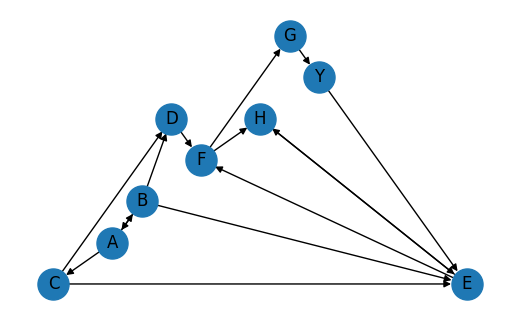

In [147]:
def visualize_graph(graph):
    plt.figure(figsize=(5, 3))
    pos = nx.planar_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_size=500)
    plt.show()
visualize_graph(union_graph)

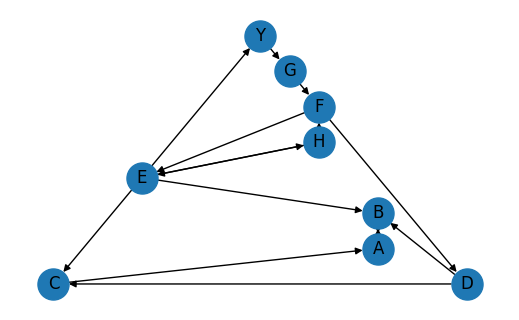

In [148]:
visualize_graph(reversed_graph)